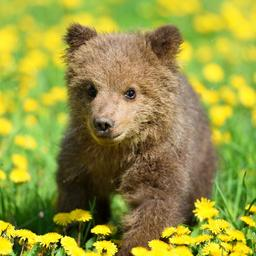

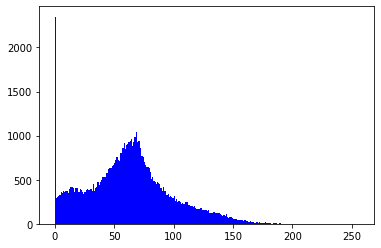

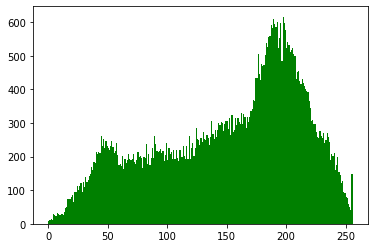

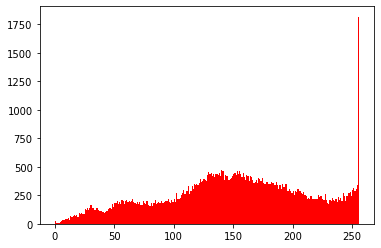

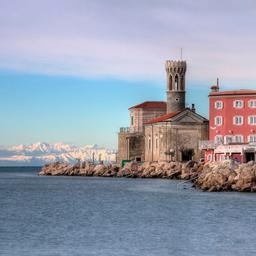

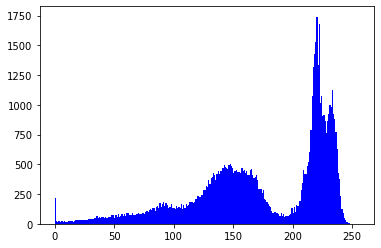

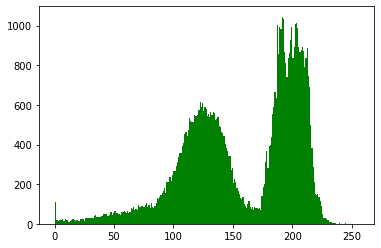

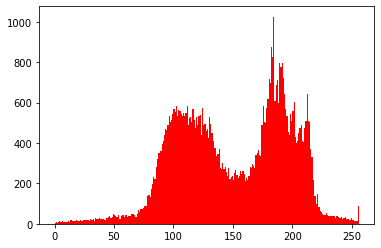

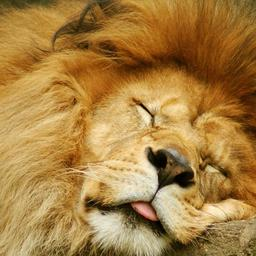

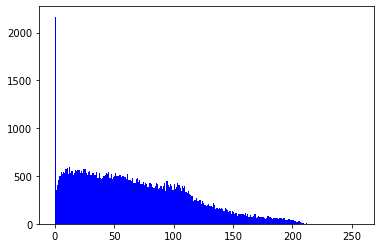

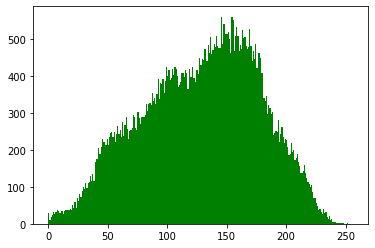

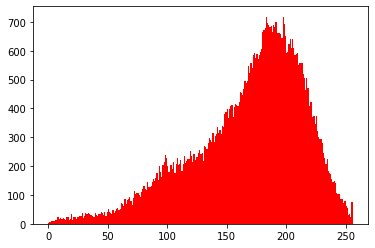

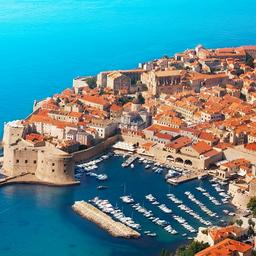

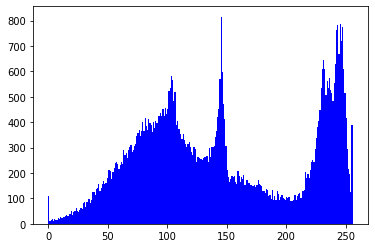

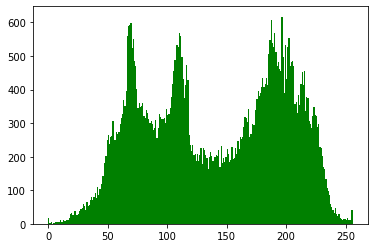

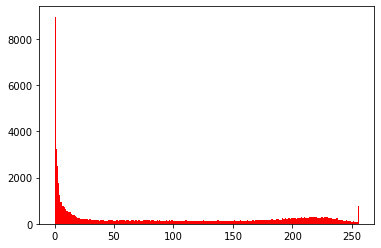

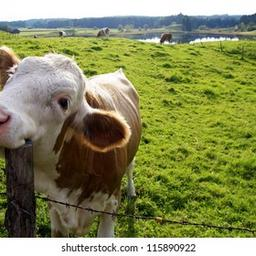

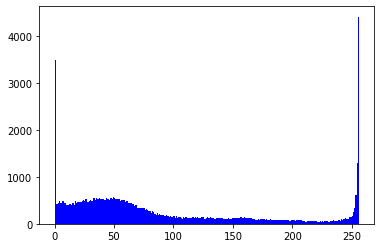

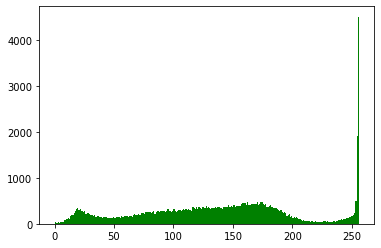

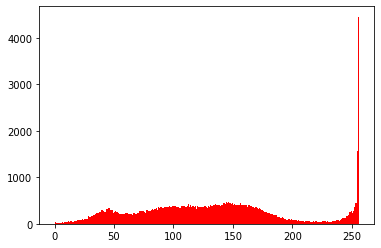

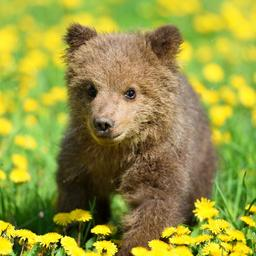

The red mean is:  149.9118194580078
The red deviation is:  61.60277007006958
The green mean is:  150.6886444091797
The green deviation is:  61.540269150217036
The blue mean is:  61.55677795410156
The blue deviation is:  35.69160710261321
The transformed red mean is:  0.0
The transformed red deviation is:  1.0
The transformed green mean is:  -0.0
The transformed green deviation is:  1.0
The transformed blue mean is:  0.0
The transformed blue deviation is:  1.0


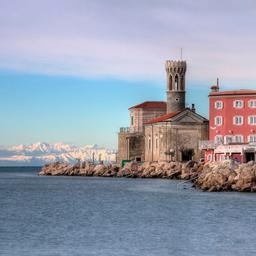

The red mean is:  149.65577697753906
The red deviation is:  45.81012218849081
The green mean is:  157.19688415527344
The green deviation is:  47.08049344914469
The blue mean is:  173.2362060546875
The blue deviation is:  55.675462276627286
The transformed red mean is:  -0.0
The transformed red deviation is:  1.0
The transformed green mean is:  0.0
The transformed green deviation is:  1.0
The transformed blue mean is:  -0.0
The transformed blue deviation is:  1.0


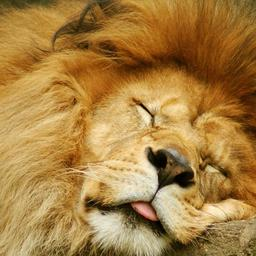

The red mean is:  167.79156494140625
The red deviation is:  46.947267993239954
The green mean is:  127.965576171875
The green deviation is:  49.059891080110496
The blue mean is:  66.34959411621094
The blue deviation is:  47.003034572349904
The transformed red mean is:  0.0
The transformed red deviation is:  1.0
The transformed green mean is:  -0.0
The transformed green deviation is:  1.0
The transformed blue mean is:  0.0
The transformed blue deviation is:  1.0


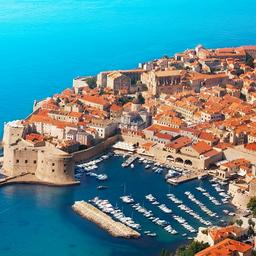

The red mean is:  90.99932861328125
The red deviation is:  89.20319882647526
The green mean is:  139.4330291748047
The green deviation is:  57.913345324907525
The blue mean is:  146.34674072265625
The blue deviation is:  68.21422422796824
The transformed red mean is:  -0.0
The transformed red deviation is:  1.0
The transformed green mean is:  -0.0
The transformed green deviation is:  1.0
The transformed blue mean is:  0.0
The transformed blue deviation is:  1.0


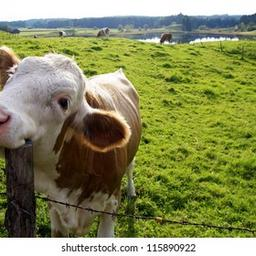

The red mean is:  134.9107208251953
The red deviation is:  65.97790038410639
The green mean is:  138.88966369628906
The green deviation is:  68.28903708890948
The blue mean is:  91.22470092773438
The blue deviation is:  81.956322355231
The transformed red mean is:  0.0
The transformed red deviation is:  1.0
The transformed green mean is:  -0.0
The transformed green deviation is:  1.0
The transformed blue mean is:  -0.0
The transformed blue deviation is:  1.0


In [38]:
import numpy as np
import math
from matplotlib import pyplot as plt
import cv2 as cv 
from google.colab.patches import cv2_imshow

images = ["firstImage.jpg", "secondImage.jpg", "thirdImage.jpg", "fourthImage.jpg", "fifthImage.jpg"]

for i in range(len(images)):
  currentImage = cv.imread(images[i])
  cv2_imshow(currentImage)
  b, g, r = cv.split(currentImage)
  plt.hist(b.ravel(), 256, [0, 256], color="blue")
  plt.show()
  plt.hist(g.ravel(), 256, [0, 256], color="green")
  plt.show()
  plt.hist(r.ravel(), 256, [0, 256], color="red")
  plt.show()



#hist = cv.calcHist([firstImage], [0], None, [256], [0, 256])
#plt.plot(hist)
#plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

for i in range(len(images)):
    currentImage = cv.imread(images[i])
    n = 0
    otherRedSum = otherBlueSum = otherGreenSum = 0
    redSum = blueSum = greenSum = 0
    cv2_imshow(currentImage)
    for j in range(256):
        for k in range(256):
            b, g, r = currentImage[j, k, :]
            redSum += r
            blueSum += b
            greenSum += g
            n+=1
    redMean = redSum / n
    blueMean = blueSum / n
    greenMean = greenSum / n
    for j in range(256):
        for k in range(256):
            b, g, r = currentImage[j, k, :]
            otherRedSum += (r - redMean) * (r - redMean)
            otherBlueSum += (b - blueMean) * (b - blueMean)
            otherGreenSum += (g - greenMean) * (g - greenMean)
    redVariance = otherRedSum / (n - 1)
    blueVariance = otherBlueSum / (n - 1)
    greenVariance = otherGreenSum / (n - 1)
    print("The red mean is: ", redMean)
    print("The red deviation is: ", math.sqrt(redVariance))
    print("The green mean is: ", greenMean)
    print("The green deviation is: ", math.sqrt(greenVariance))
    print("The blue mean is: ", blueMean)
    print("The blue deviation is: ", math.sqrt(blueVariance))
    hypotheticalR = []
    hypotheticalB = []
    hypotheticalG = []
    for j in range(256):
        for k in range(256):
            b, g, r = currentImage[j, k, :]
            hypotheticalR.append((r + (0 - redMean)) / math.sqrt(redVariance)) 
            hypotheticalB.append((b + (0 - blueMean)) / math.sqrt(blueVariance))
            hypotheticalG.append((g + (0 - greenMean)) / math.sqrt(greenVariance))
    redSum = blueSum = greenSum = 0
    otherRedSum = otherGreenSum = otherBlueSum = 0
    n=0
    for j in range(256):
        for k in range(256):
            
            redSum += hypotheticalR[j*256+k]
            blueSum += hypotheticalB[j*256+k]
            greenSum += hypotheticalG[j*256+k]
            n+=1
        
    redMean = redSum / n
    blueMean = blueSum / n
    greenMean = greenSum / n
    for j in range(256):
        for k in range(256):
            otherRedSum += (hypotheticalR[j*256+k] - redMean) * (hypotheticalR[j*256+k] - redMean)
            otherBlueSum += (hypotheticalB[j*256+k] - blueMean) * (hypotheticalB[j*256+k] - blueMean)
            otherGreenSum += (hypotheticalG[j*256+k] - greenMean) * (hypotheticalG[j*256+k] - greenMean)
    redVariance = otherRedSum / (n - 1)
    blueVariance = otherBlueSum / (n - 1)
    greenVariance = otherGreenSum / (n - 1)
    print("The transformed red mean is: ", round(redMean, 3))
    print("The transformed red deviation is: ", round(math.sqrt(redVariance), 3))
    print("The transformed green mean is: ", round(greenMean, 3))
    print("The transformed green deviation is: ", round(math.sqrt(greenVariance), 3))
    print("The transformed blue mean is: ", round(blueMean, 3))
    print("The transformed blue deviation is: ", round(math.sqrt(blueVariance), 3))
    
    

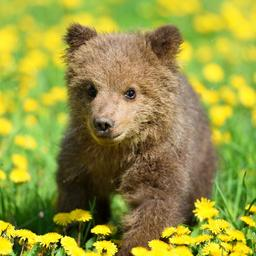

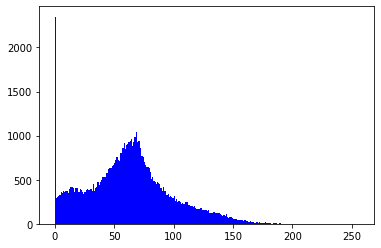

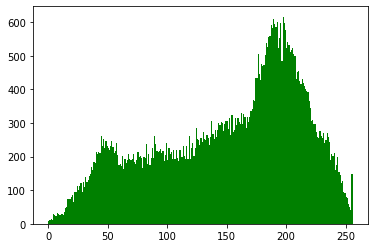

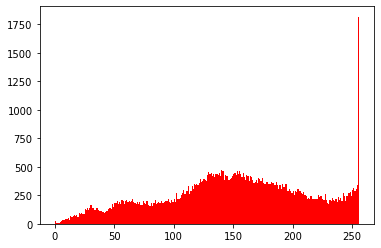

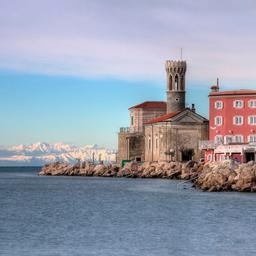

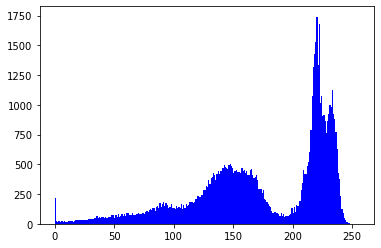

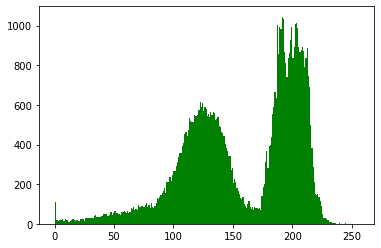

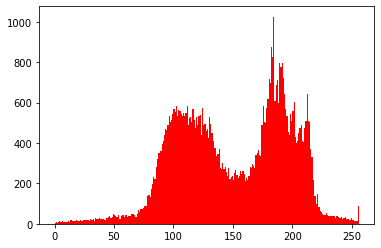

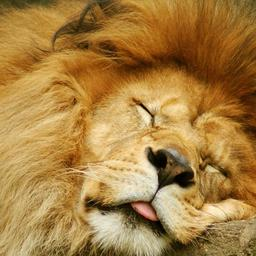

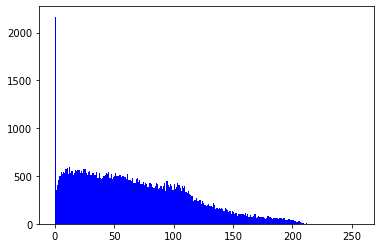

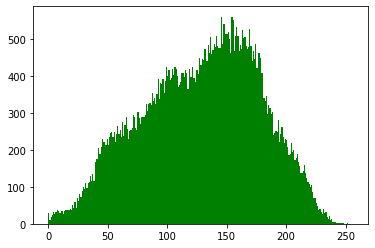

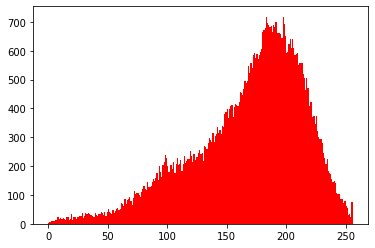

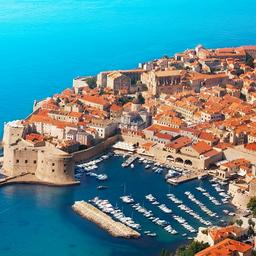

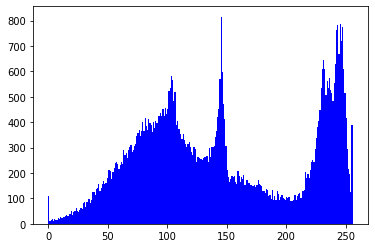

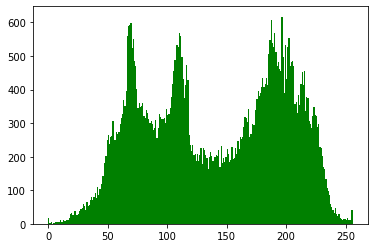

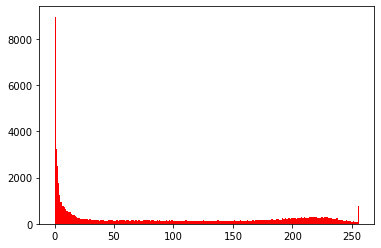

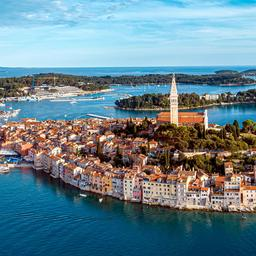

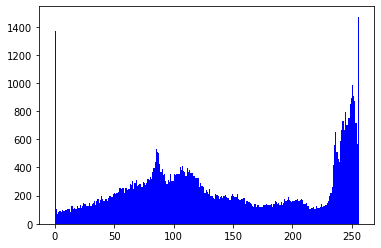

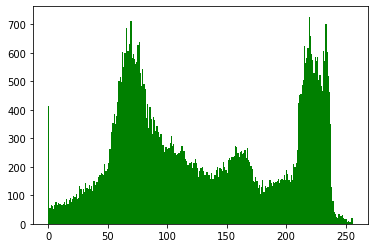

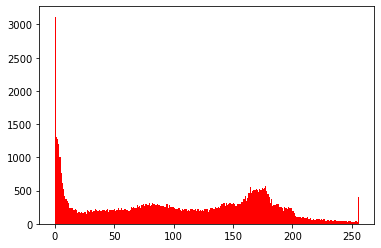

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv 
from google.colab.patches import cv2_imshow

images = ["firstImage.jpg", "secondImage.jpg", "thirdImage.jpg", "fourthImage.jpg", "fifthImage.jpg"]

for i in range(len(images)):
  currentImage = cv.imread(images[i])
  cv2_imshow(currentImage)
  b, g, r = cv.split(currentImage)
  plt.hist(b.ravel(), 256, [0, 256], color="blue")
  plt.show()
  plt.hist(g.ravel(), 256, [0, 256], color="green")
  plt.show()
  plt.hist(r.ravel(), 256, [0, 256], color="red")
  plt.show()



#hist = cv.calcHist([firstImage], [0], None, [256], [0, 256])
#plt.plot(hist)
#plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

In [37]:
# for data transformation
import numpy as np
# for visualizing the data
import matplotlib.pyplot as plt
# for opening the media file
import scipy.io.wavfile as wavfile
Fs, aud = wavfile.read('firstAudio.mp3')
# select left channel only
aud = aud[:,0]
# trim the first 125 seconds
first = aud[:int(Fs*125)]
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, Fs=Fs)
plt.show()

ValueError: ignored